<table width = 400 align="left" style="font-size:20px">
<tr>
    <td style="text-align:left"><b>Name</b></td>
    <td style="text-align:left">Aishwarya Chandramouli</td>
</tr>
<tr>
    <td> </td>
    <td style="text-align:left">ac78n@mst.edu</td> 
</tr>
<tr>
    <td style="text-align:left"><b>Course:</b></td>
    <td style="text-align:left">CS 5402</td>
</tr>
<tr>
    <td style="text-align:left"><b>Programming Assignment 03</b></td>
    <td style="text-align:left">Classifying Unknown Animals as Mammal or not Mammal</td>
</tr>
<tr>
    <td style="text-align:left"><b>Date:</b></td>
    <td style="text-align:left">2021-07-06</td>
</tr>
</table>

In [1]:
# Imported for data management (dataframes)
import pandas as pd

# This package needs part of anaconda and needs to be installed
#    conda install -c conda-forge wordcloud

# Imported to allow for the display of word clouds
import matplotlib.pyplot as plt

# Imported to create train/test partitioning of the data.
from sklearn.model_selection import train_test_split

# Imported to get frequency counts
import collections

# Imported to use confusion matrix.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 

## Concept Description:
Train a system from existing data to classify animals as either mammal or not mammal.

## Data Collection:
The data has been provided by Perry B. Koob, not professor or doctor as a part of our assignment on canvas. 

## Example Description:

<b>animal name</b>

This is a nominal attribute that contains the name of the animal.

<b>hair</b>

This is a nominal and boolean attribute that describes if the animal has hair.

<b>feathers</b>

This is a nominal and boolean attribute that describes if the animal has feathers.

<b>eggs</b>

This is a nominal and boolean attribute that describes if the animal lays eggs.

<b>milk</b>

This is a nominal and boolean attribute that describes if the animal gives milk.

<b>airborne</b>

This is a nominal and boolean attribute that describes if the animal is a airborne.

<b>aquatic</b>

This is a nominal and boolean attribute that describes if the animal lives in water.

<b>predator</b>

This is a nominal and boolean attribute that describes if the animal feeds on other animals.

<b>toothed</b>

This is a nominal and boolean attribute that describes if the animal has teeth.

<b>backbone</b>

This is a nominal and boolean attribute that describes if the animals have backbone.

<b>breathes</b>

This is a nominal and boolean attribute that describes if the animals breathes.

<b>venemous</b>

This is a nominal and boolean attribute that describes if the animal is venomous.

<b>fins</b>

This is a nominal and boolean attribute that describes if the animal has fins.

<b>legs</b>

This is a ratio and numeric attribute that describes if the animal has legs as: 0 legs 2 legs 4 legs 5 legs 6 legs 8 legs 12 legs

<b>tail</b>

This is a Nominal and boolean attribute that describes if the animal has tail.

<b>domestic</b>

This is a Nominal and boolean attribute that describes if the animal is domestic.

<b>catsize</b>

This is a Nominal and boolean attribute that describes if the animal is catsize.

<b>gestation</b>

This is an interval attribute that describes the animal's gestation period and has missing values. 

<b>type</b>

This is a nominal attribute used to identify the type of the animal.

<b>ismammal</b>

This is a binary class label generated from the type class label. It is a transformation of a nominal Class label, so it is also nominal. The labels are now mammal and not mammal.

<b>degestation</b>

The values are discretized and generated from the interval attribute gestation.

## Data Import and Wrangling: 

The results of each search is read from the respective excel into separate dataframes.  Careful attention is paid to make sure the data is read in as character strings.

In [2]:
df = pd.read_excel("animal-taxonomy.xlsx", dtype=str)

In [3]:
df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'gestation', 'type'],
      dtype='object')

In [4]:
df.loc[(df['type'] == 'mammal'),'ismammal'] = 'mammal'
df.loc[(df['type'] != 'mammal'),'ismammal'] = 'non-mammal'

In [5]:
df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'gestation', 'type',
       'ismammal'],
      dtype='object')

In [6]:
#dropping null values since gestation attribute has NaN 
df = df[df['gestation'].notna()]

In [7]:
df.dropna()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,gestation,type,ismammal
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,213,mammal,mammal
1,anole,False,False,True,False,False,False,False,True,True,True,False,False,4,True,False,False,42,reptile,non-mammal
2,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,274,mammal,mammal
3,axolotl,False,False,True,False,False,True,False,True,True,False,False,False,4,True,False,False,17,amphibian,non-mammal
4,bass,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,5,fish,non-mammal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,wallaby,True,False,False,True,False,False,False,True,True,True,False,False,2,True,False,True,30,mammal,mammal
125,wasp,True,False,True,False,True,False,False,False,False,True,True,False,6,False,False,False,88,insect,non-mammal
126,whale shark,False,False,False,False,False,False,False,True,True,False,False,True,0,True,False,False,360,fish,non-mammal
127,wolf,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,68,mammal,mammal


In [8]:
df.isna().any()

animal name    False
hair           False
feathers       False
eggs           False
milk           False
airborne       False
aquatic        False
predator       False
toothed        False
backbone       False
breathes       False
venomous       False
fins           False
legs           False
tail           False
domestic       False
catsize        False
gestation      False
type           False
ismammal       False
dtype: bool

### Partition the data into a training set and a test set using a 80/20 split.

In [9]:
X = df.drop(columns=['type','ismammal'])
Y = df[['ismammal']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.80,random_state=123)

In [10]:
Y

,ismammal
0,mammal
1,non-mammal
2,mammal
3,non-mammal
4,non-mammal
...,...
124,mammal
125,non-mammal
126,non-mammal
127,mammal


## Exploratory Data Analysis:
Looking into what type of measure the attributes are.

In [11]:
df.describe()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,gestation,type,ismammal
count,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125
unique,125,2,2,2,2,2,2,2,2,2,2,2,2,7,2,2,2,80,8,2
top,wren,False,False,True,False,False,False,True,True,True,True,False,False,4,True,False,False,42,mammal,non-mammal
freq,1,72,105,70,74,101,79,67,87,105,95,114,104,53,96,112,77,7,50,75


##### Here, I've plotted graphs for each attribute. 

Text(0, 0.5, 'Count')

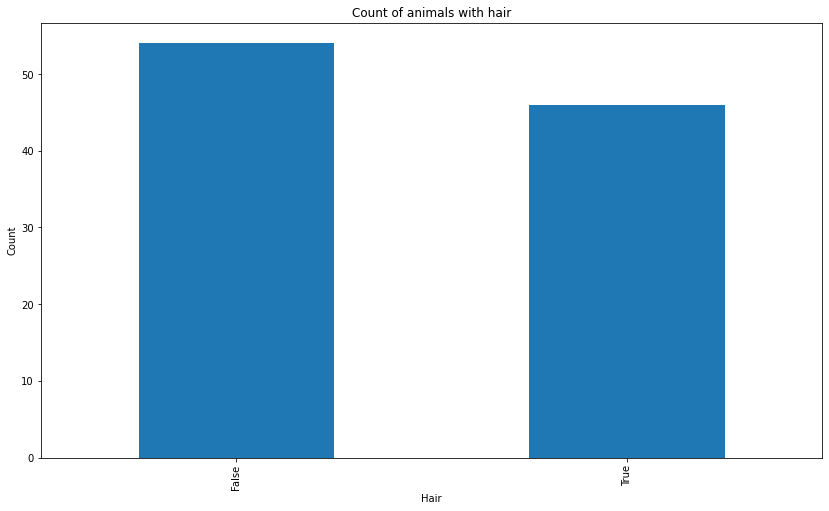

In [12]:
#Hair
plot = X_train['hair'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of animals with hair")
plot.set_xlabel("Hair")
plot.set_ylabel("Count")

Text(0, 0.5, 'Count')

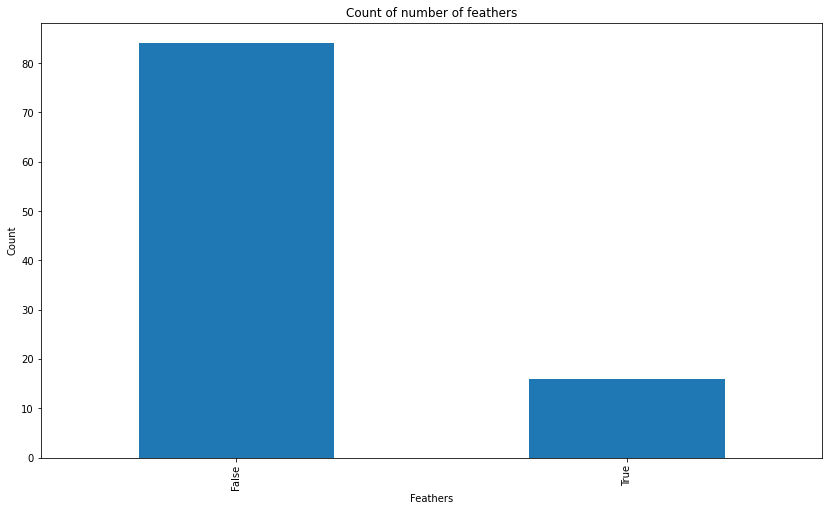

In [13]:
#Feathers
plot = X_train['feathers'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of number of feathers")
plot.set_xlabel("Feathers")
plot.set_ylabel("Count")

Text(0, 0.5, 'Count')

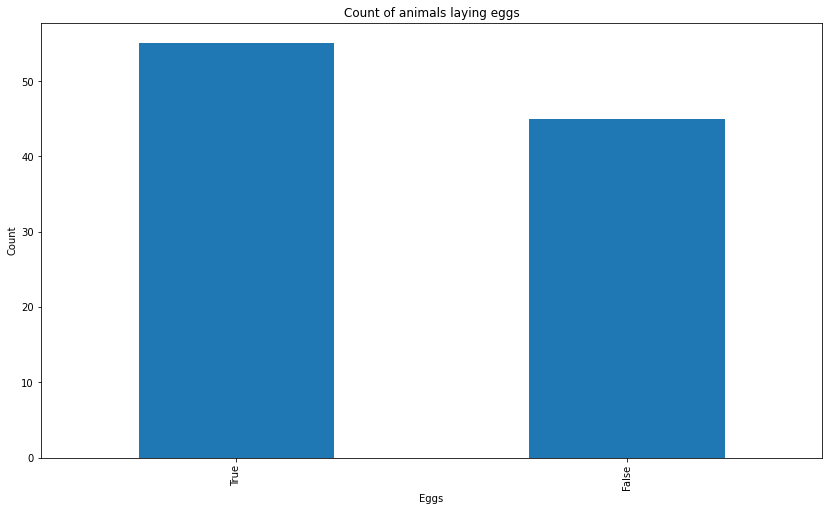

In [14]:
#Eggs
plot = X_train['eggs'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of animals laying eggs")
plot.set_xlabel("Eggs")
plot.set_ylabel("Count")

Text(0, 0.5, 'Count')

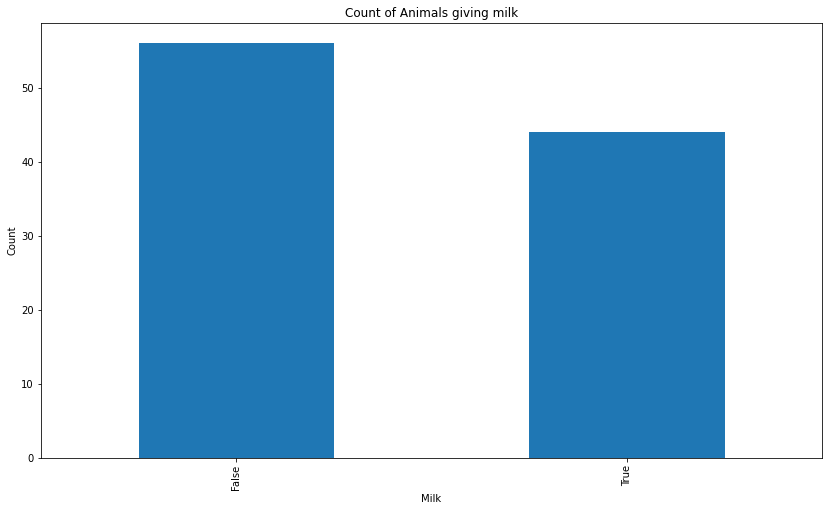

In [15]:
#Milk
plot = X_train['milk'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of Animals giving milk")
plot.set_xlabel("Milk")
plot.set_ylabel("Count")

Text(0, 0.5, 'Count')

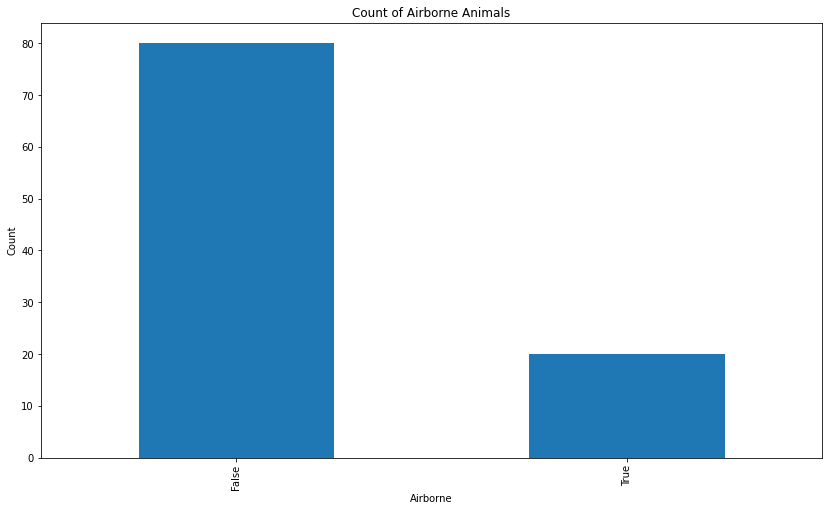

In [16]:
#Airborne
plot = X_train['airborne'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of Airborne Animals")
plot.set_xlabel("Airborne")
plot.set_ylabel("Count")

Text(0, 0.5, 'Count')

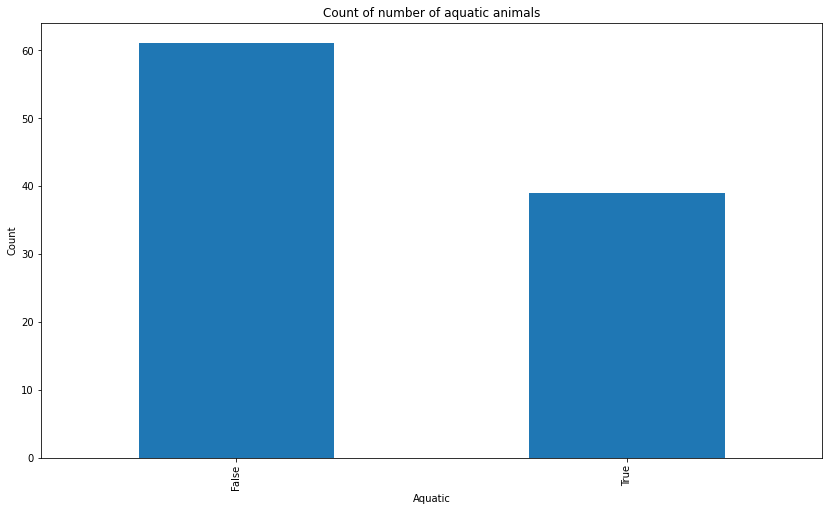

In [17]:
#Aquatic
plot = X_train['aquatic'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of number of aquatic animals")
plot.set_xlabel("Aquatic")
plot.set_ylabel("Count")

Text(0, 0.5, 'Count')

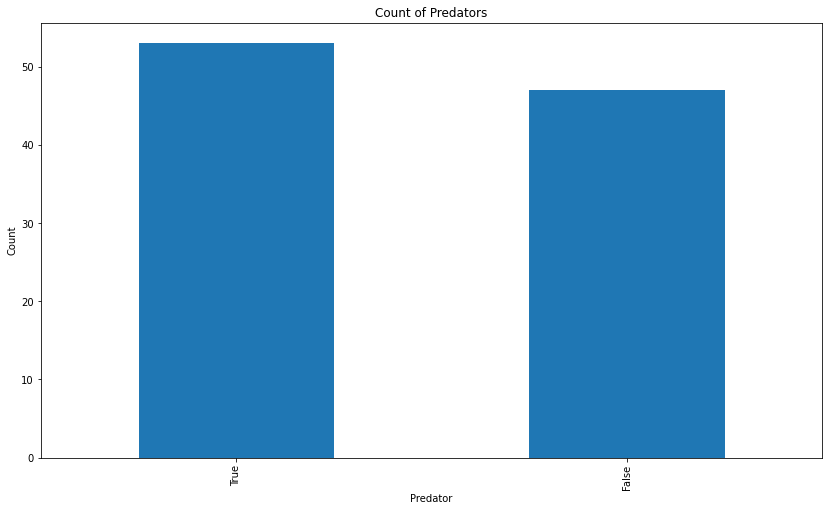

In [18]:
#Predator
plot = X_train['predator'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of Predators")
plot.set_xlabel("Predator")
plot.set_ylabel("Count")

Text(0, 0.5, 'Count')

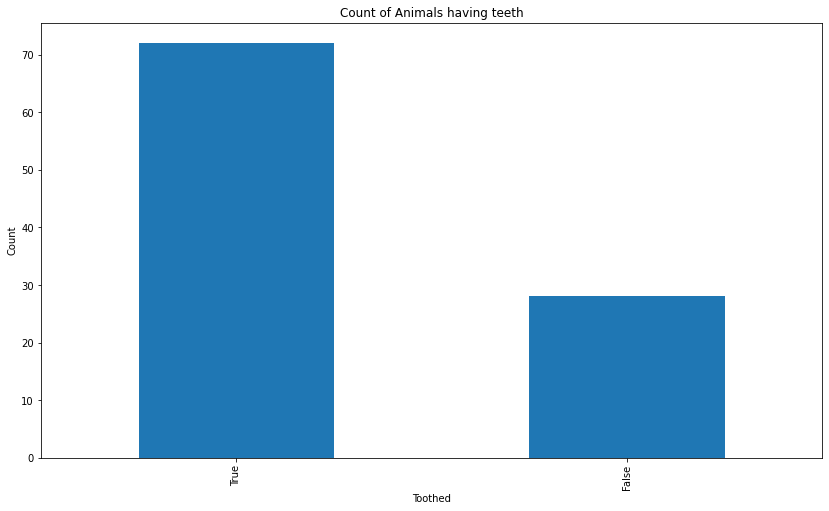

In [19]:
#Toothed
plot = X_train['toothed'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of Animals having teeth")
plot.set_xlabel("Toothed")
plot.set_ylabel("Count")

Text(0, 0.5, 'Count')

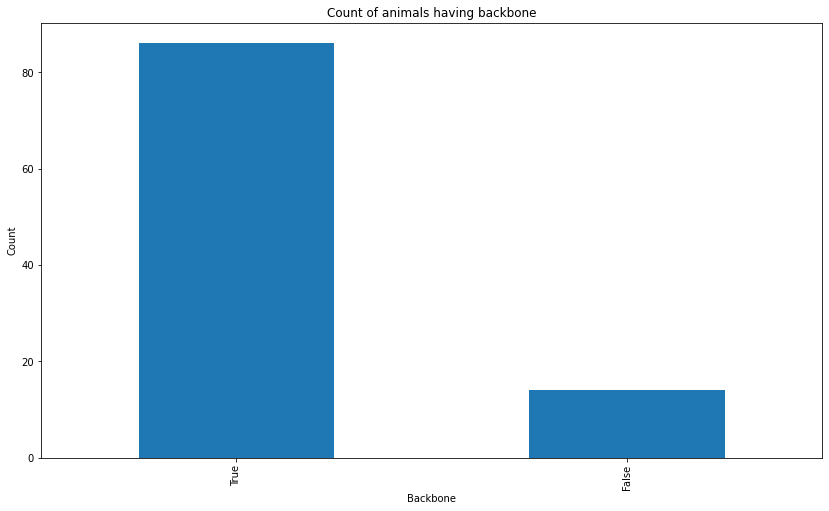

In [20]:
#Backbone
plot = X_train['backbone'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of animals having backbone")
plot.set_xlabel("Backbone")
plot.set_ylabel("Count")

Text(0, 0.5, 'Count')

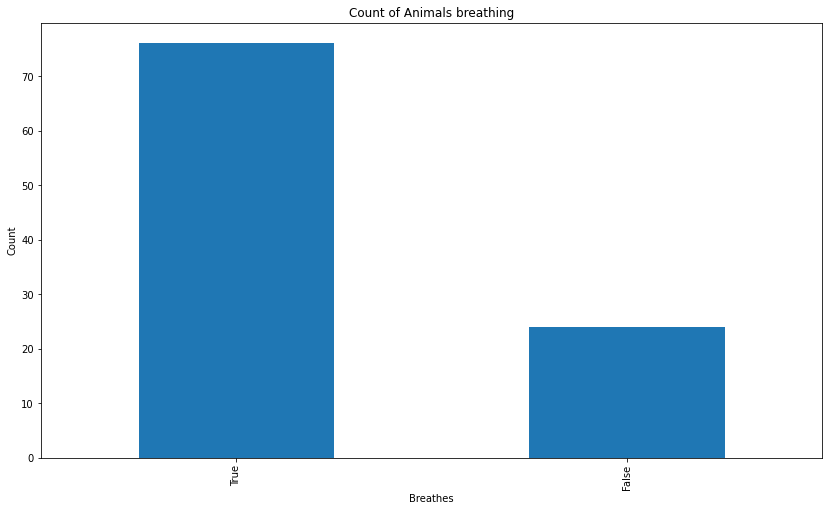

In [21]:
#Breathes
plot = X_train['breathes'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of Animals breathing")
plot.set_xlabel("Breathes")
plot.set_ylabel("Count")

Text(0, 0.5, 'Count')

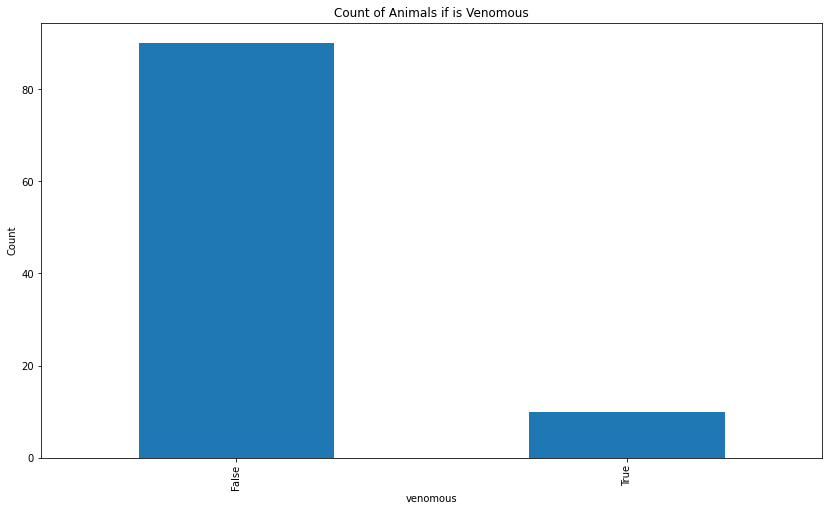

In [22]:
#Venomous
plot = X_train['venomous'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of Animals if is Venomous")
plot.set_xlabel("venomous")
plot.set_ylabel("Count")

Text(0, 0.5, 'Count')

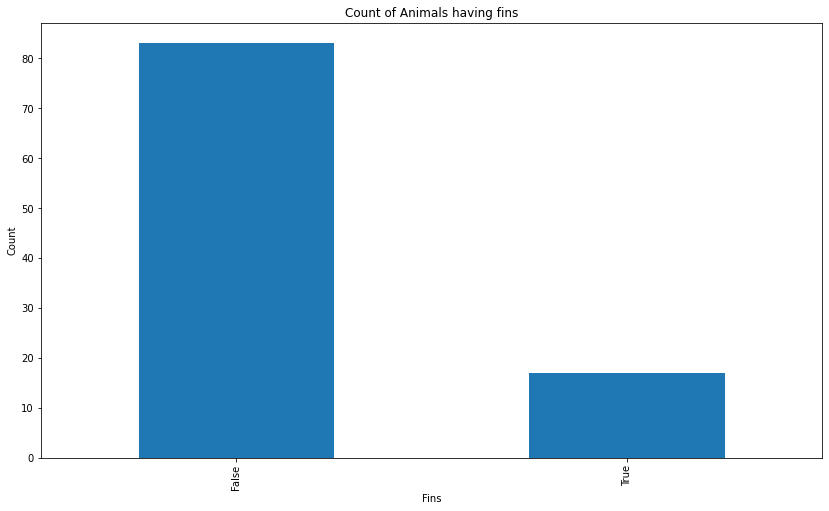

In [23]:
#Fins
plot = X_train['fins'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of Animals having fins")
plot.set_xlabel("Fins")
plot.set_ylabel("Count")

Text(0, 0.5, 'Count')

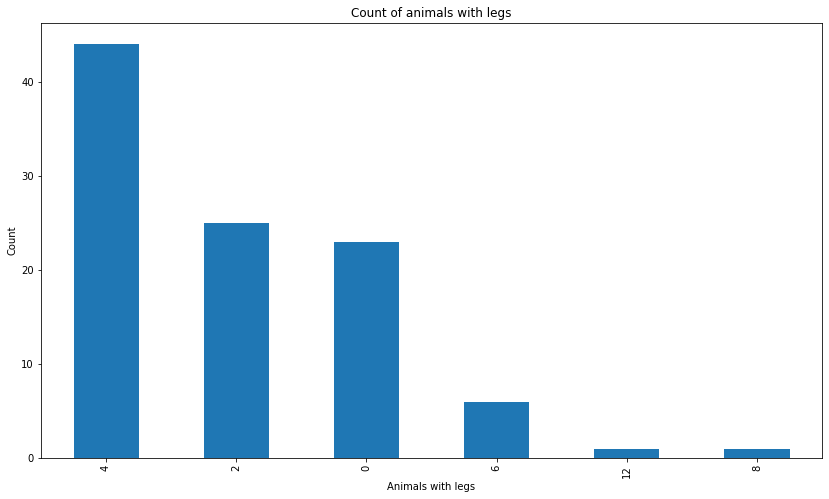

In [24]:
#Legs
plot = X_train['legs'].value_counts().plot(kind='bar',figsize=(14,8),title="Count of animals with legs")
plot.set_xlabel("Animals with legs")
plot.set_ylabel("Count")

Text(0, 0.5, 'Count')

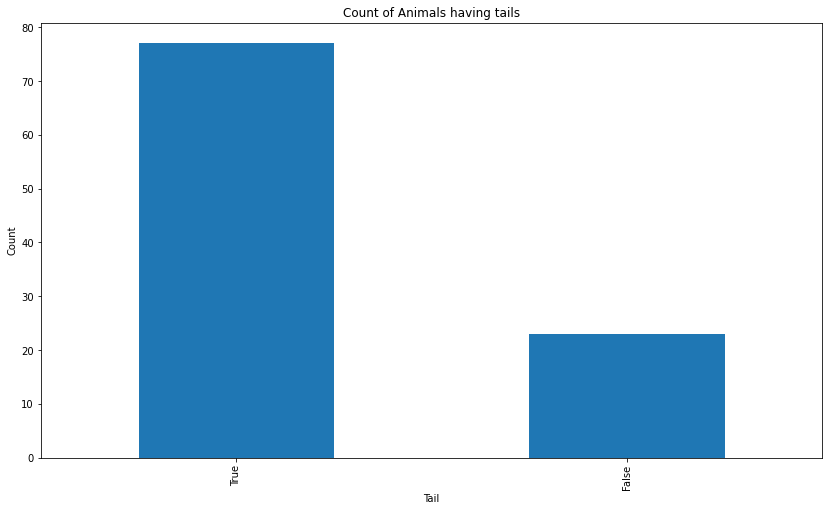

In [25]:
#tail
plot = X_train['tail'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of Animals having tails")
plot.set_xlabel("Tail")
plot.set_ylabel("Count")

Text(0, 0.5, 'Count')

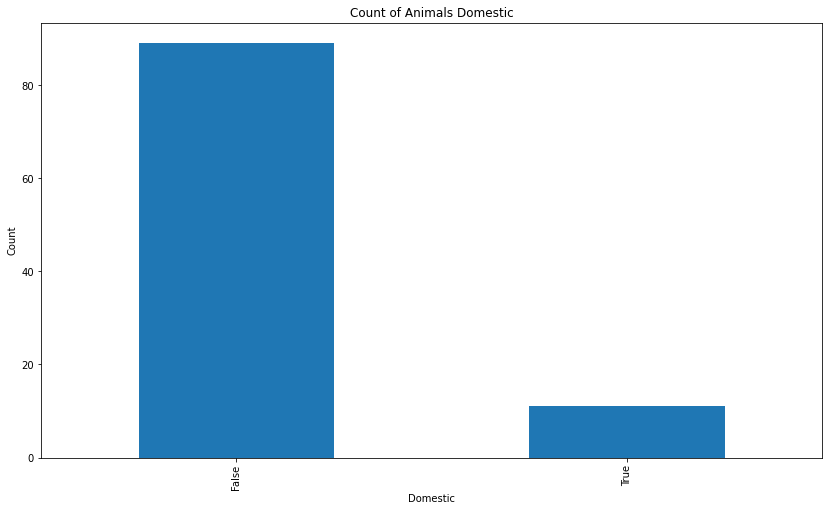

In [26]:
#domestic
plot = X_train['domestic'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of Animals Domestic")
plot.set_xlabel("Domestic")
plot.set_ylabel("Count")

Text(0, 0.5, 'Count')

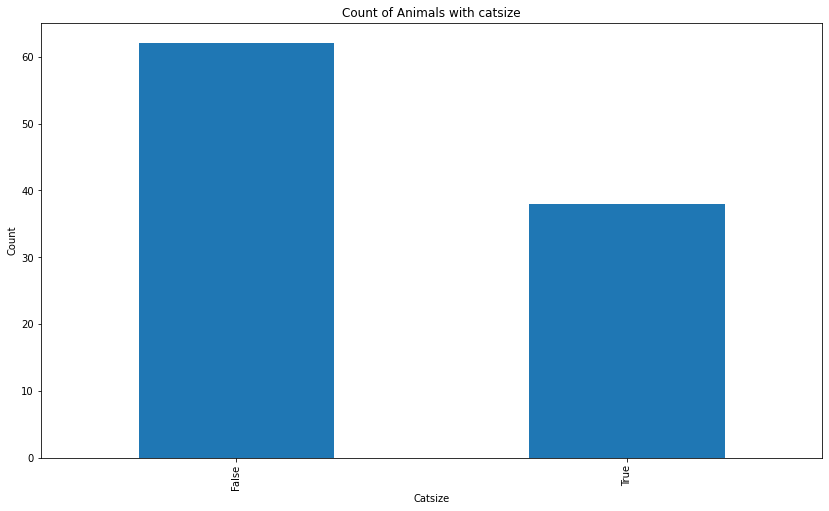

In [27]:
#catsize
plot = X_train['catsize'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of Animals with catsize")
plot.set_xlabel("Catsize")
plot.set_ylabel("Count")

Text(0, 0.5, 'Count')

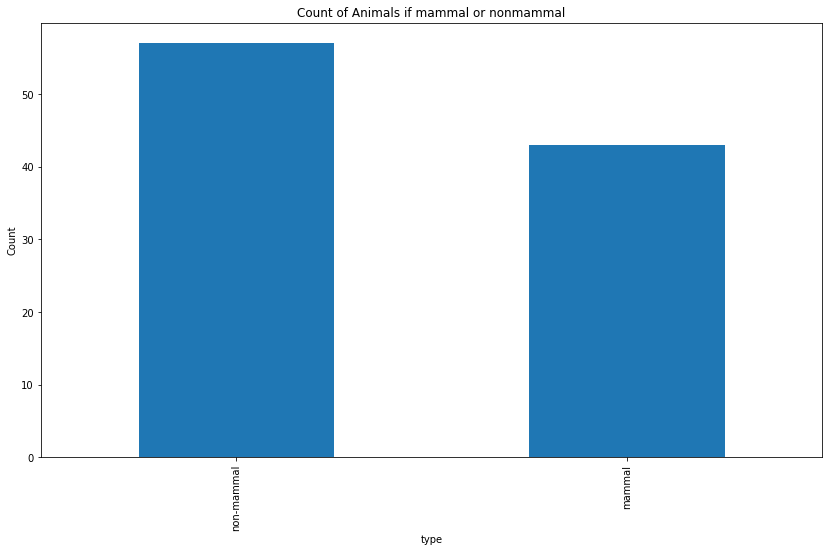

In [28]:
#ismammal
plot = Y_train['ismammal'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of Animals if mammal or nonmammal")
plot.set_xlabel("type")
plot.set_ylabel("Count")

Text(0, 0.5, 'Count')

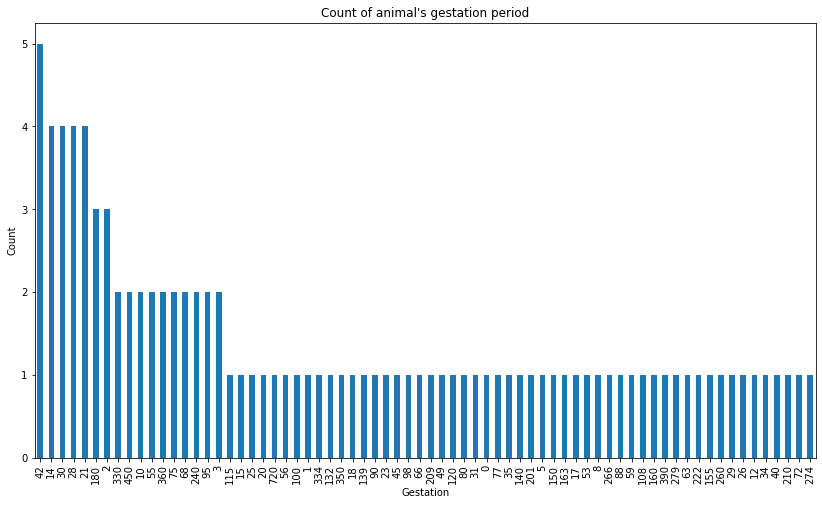

In [29]:
#Gestation
plot = X_train['gestation'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of animal's gestation period")
plot.set_xlabel("Gestation")
plot.set_ylabel("Count")

In [30]:
X_train['gestation'].describe()

count     100
unique     70
top        42
freq        5
Name: gestation, dtype: object

In [31]:
X_train['gestation'] = X_train['gestation'].astype('int')
X_train.loc[(X_train['gestation'] <=2 ),'degestation'] = 0
X_train.loc[(X_train['gestation'] > 2 ),'degestation'] = 1
X_train = X_train.drop(columns=['gestation'])

X_test['gestation'] = X_test['gestation'].astype('int')
X_test.loc[(X_test['gestation'] <=2 ),'degestation'] = 0
X_test.loc[(X_test['gestation'] >2 ),'degestation'] = 1
X_test = X_test.drop(columns=['gestation'])

<ipython-input-31-a9be276f2903>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['gestation'] = X_train['gestation'].astype('int')
C:\Users\aishw\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\aishw\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

## Mining or Analytics:
Using two way tables to get frequency of attribute per class.

In [32]:
#hair
hair_col = pd.crosstab(index=X_train["hair"],columns=Y_train["ismammal"],margins=True)
hair_col

ismammal,mammal,non-mammal,All
hair,,,
False,1,53,54
True,42,4,46
All,43,57,100


Based on the frequency of mammal count and not mammal count, we can generate the following rule set for the hair attribute:

True-> mammal

False -> non-mammal

Now we determine the error rate of the hair column rules.

In [33]:
errors = 0
errors += hair_col.loc['True','non-mammal']
errors += hair_col.loc['False','mammal']
error_rate = errors/hair_col.loc['All','All']
error_rate

0.05

In [34]:
#feathers
feathers_col = pd.crosstab(index=X_train["feathers"],columns=Y_train["ismammal"],margins=True)
feathers_col

ismammal,mammal,non-mammal,All
feathers,,,
False,43,41,84
True,0,16,16
All,43,57,100


Based on the frequency of mammal and nonmammal count, we would generate the following rule set for the feathers attribute:

True -> non-mammal

False -> non-mammal

Now we determine the error rate of the feathers rules.

In [35]:
errors = 0
errors += feathers_col.loc['True','mammal']
errors += feathers_col.loc['False','mammal']
error_rate = errors/feathers_col.loc['All','All']
error_rate

0.43

In [36]:
#eggs
eggs_col = pd.crosstab(index=X_train["eggs"],columns=Y_train["ismammal"],margins=True)
eggs_col

ismammal,mammal,non-mammal,All
eggs,,,
False,42,3,45
True,1,54,55
All,43,57,100


Based on the frequency of mammal and non mammal , we would generate the following rule set for the eggs attribute:

True -> non-mammal

False -> mammal

Now we determine the error rate of the eggs rules.

In [37]:
errors = 0
errors += eggs_col.loc['True','mammal']
errors += eggs_col.loc['False','non-mammal']
error_rate = errors/eggs_col.loc['All','All']
error_rate

0.04

In [38]:
#milk
milk_col = pd.crosstab(index=X_train["milk"],columns=Y_train["ismammal"],margins=True)
milk_col

ismammal,mammal,non-mammal,All
milk,,,
False,0,56,56
True,43,1,44
All,43,57,100


Based on the frequency of mammal and nonmammal, we would generate the following rule set for the milk attribute:

True -> mammal

False -> non-mammal

Now we determine the error rate of the milk rules.

In [39]:
errors = 0
errors += milk_col.loc['True','non-mammal']
errors += milk_col.loc['False','mammal']
error_rate = errors/milk_col.loc['All','All']
error_rate

0.01

In [40]:
#airborne
airborne_col = pd.crosstab(index=X_train["airborne"],columns=Y_train["ismammal"],margins=True)
airborne_col

ismammal,mammal,non-mammal,All
airborne,,,
False,41,39,80
True,2,18,20
All,43,57,100


Based on the frequency of mammal and non-mammal, we would generate the following rule set for the airborne attribute:

False -> non-mammal

True -> non-mammal

Now we determine the error rate of the airborne rules.

In [41]:
errors = 0
errors += airborne_col.loc['False','mammal']
errors += airborne_col.loc['True','mammal']
error_rate = errors/airborne_col.loc['All','All']
error_rate

0.43

In [42]:
#aquatic
aquatic_col = pd.crosstab(index=X_train["aquatic"],columns=Y_train["ismammal"],margins=True)
aquatic_col

ismammal,mammal,non-mammal,All
aquatic,,,
False,37,24,61
True,6,33,39
All,43,57,100


Based on the frequency of mammal and nonmammal, we would generate the following rule set for the aquatic attribute:

False -> mammal

True -> non-mammal

Now we determine the error rate of the aquatic rules.

In [43]:
errors = 0
errors += aquatic_col.loc['False','non-mammal']
errors += aquatic_col.loc['True','mammal']
error_rate = errors/aquatic_col.loc['All','All']
error_rate

0.3

In [44]:
#predator
predator_col = pd.crosstab(index=X_train["predator"],columns=Y_train["ismammal"],margins=True)
predator_col

ismammal,mammal,non-mammal,All
predator,,,
False,23,24,47
True,20,33,53
All,43,57,100


Based on the frequency of mammal and nonmammal, we would generate the following rule set for the predator attribute:
    
False -> non-mammal

True -> non-mammal

Now we determine the error rate of the predator rules.

In [45]:
errors = 0
errors += predator_col.loc['False','mammal']
errors += predator_col.loc['True','mammal']
error_rate = errors/predator_col.loc['All','All']
error_rate

0.43

In [46]:
#toothed
toothed_col = pd.crosstab(index=X_train["toothed"],columns=Y_train["ismammal"],margins=True)
toothed_col

ismammal,mammal,non-mammal,All
toothed,,,
False,1,27,28
True,42,30,72
All,43,57,100


Based on the frequency of mammal and nonmammal, we would generate the following rule set for the toothed attribute:
    
False -> non-mammal

True -> mammal

Now we determine the error rate of the toothed rules.

In [47]:
errors = 0
errors += toothed_col.loc['False','mammal']
errors += toothed_col.loc['True','non-mammal']
error_rate = errors/toothed_col.loc['All','All']
error_rate

0.31

In [48]:
#backbone
backbone_col = pd.crosstab(index=X_train["backbone"],columns=Y_train["ismammal"],margins=True)
backbone_col

ismammal,mammal,non-mammal,All
backbone,,,
False,0,14,14
True,43,43,86
All,43,57,100


Base on the frequency of mammal and nonmammal, we would generate the following rule set for the backbone attribute:
    
False -> non-mammal

True -> non-mammal

Now we determine the error rate of the backbone rules.

In [49]:
#breathes
breathes_col = pd.crosstab(index=X_train["breathes"],columns=Y_train["ismammal"],margins=True)
breathes_col

ismammal,mammal,non-mammal,All
breathes,,,
False,0,24,24
True,43,33,76
All,43,57,100


Based on the frequency of mammal and nonmammal, we would generate the following rule set for the breathes attribute:

False -> non-mammal

True -> mammal

Now we determine the error rate of the breathes rules.

In [50]:
errors = 0
errors += breathes_col.loc['False','mammal']
errors += breathes_col.loc['True','mammal']
error_rate = errors/breathes_col.loc['All','All']
error_rate

0.43

In [51]:
#venomous
venomous_col = pd.crosstab(index=X_train["venomous"],columns=Y_train["ismammal"],margins=True)
venomous_col

ismammal,mammal,non-mammal,All
venomous,,,
False,42,48,90
True,1,9,10
All,43,57,100


Base on the frequency of mammal and non-mammal, we would generate the following rule set for the venomous attribute:

False -> non-mammal 

True -> non-mammal

Now we determine the error rate of the venomous rules

In [52]:
errors = 0
errors += venomous_col.loc['False','mammal']
errors += venomous_col.loc['True','mammal']
error_rate = errors/venomous_col.loc['All','All']
error_rate

0.43

In [53]:
#fins
fins_col = pd.crosstab(index=X_train["fins"],columns=Y_train["ismammal"],margins=True)
fins_col

ismammal,mammal,non-mammal,All
fins,,,
False,40,43,83
True,3,14,17
All,43,57,100


Based on the frequency of mammal and nonmammal, we would generate the following rule set for the fins attribute:

False -> non-mammal 

True -> non-mammal

Now we determine the error rate of the fins rules.


In [54]:
errors = 0
errors += fins_col.loc['False','mammal']
errors += fins_col.loc['True','mammal']
error_rate = errors/fins_col.loc['All','All']
error_rate

0.43

In [55]:
#legs
legs_col = pd.crosstab(index=X_train["legs"],columns=Y_train["ismammal"],margins=True)
legs_col

ismammal,mammal,non-mammal,All
legs,,,
0,2,21,23
12,0,1,1
2,8,17,25
4,33,11,44
6,0,6,6
8,0,1,1
All,43,57,100


Based on the frequency of mammal and nonmammal, we would generate the following rule set for the legs attribute:

0->nonmammal

2->non-mammal

4->mammal

6->non-mammal

8->non-mammal

12->non-mammal

Now we determine the error rate of the legs rules.

In [56]:
errors = 0
errors += legs_col.loc['0','mammal']
errors += legs_col.loc['2','mammal']
errors += legs_col.loc['4','non-mammal']
errors += legs_col.loc['6','mammal']
errors += legs_col.loc['8','mammal']
errors += legs_col.loc['12','mammal']
error_rate = errors/legs_col.loc['All','All']
error_rate

0.21

In [57]:
#tail
tail_col = pd.crosstab(index=X_train["tail"],columns=Y_train["ismammal"],margins=True)
tail_col

ismammal,mammal,non-mammal,All
tail,,,
False,6,17,23
True,37,40,77
All,43,57,100


Based on the frequency of mammal and nonmammal, we would generate the following rule set for the tail attribute:
    
True -> non-mammal

False -> non-mammal

Now we determine the error rate of the tail rules

In [58]:
errors = 0
errors += tail_col.loc['False','mammal']
errors += tail_col.loc['True','mammal']
error_rate = errors/tail_col.loc['All','All']
error_rate

0.43

In [59]:
#domestic
domestic_col = pd.crosstab(index=X_train["domestic"],columns=Y_train["ismammal"],margins=True)
domestic_col

ismammal,mammal,non-mammal,All
domestic,,,
False,36,53,89
True,7,4,11
All,43,57,100


Based on the frequency of mammal and nonmammal, we would generate the following rule set for the domestic attribute:
    
False -> non-mammal

True -> mammal

Now we determine the error rate of the domestic rules.

In [60]:
errors = 0
errors += domestic_col.loc['False','mammal']
errors += domestic_col.loc['True','non-mammal']
error_rate = errors/domestic_col.loc['All','All']
error_rate

0.4

In [61]:
#catsize
catsize_col = pd.crosstab(index=X_train["domestic"],columns=Y_train["ismammal"],margins=True)
catsize_col

ismammal,mammal,non-mammal,All
domestic,,,
False,36,53,89
True,7,4,11
All,43,57,100


Based on the frequency of mammal and nonmammal, we would generate the following rule set for the catsize attribute:
    
False -> non-mammal

True -> mammal

Now we determine the error rate of the catsize rules.

In [62]:
errors = 0
errors += catsize_col.loc['False','mammal']
errors += catsize_col.loc['True','non-mammal']
error_rate = errors/catsize_col.loc['All','All']
error_rate

0.4

In [63]:
#degestation
degestation_col = pd.crosstab(index=X_train["degestation"],columns=Y_train["ismammal"],margins=True)
degestation_col

ismammal,mammal,non-mammal,All
degestation,,,
0.0,0,5,5
1.0,43,52,95
All,43,57,100


Based on the frequency of mammal and nonmammal, we would generate the following rule set for the discretized gestation attribute:

0 -> non-mammal

1 -> non-mammal

Now we determine the error rate of the discretized gestation rules.


In [64]:
errors = 0
errors += degestation_col.loc[0,'mammal']
errors += degestation_col.loc[1,'mammal']
error_rate = errors/degestation_col.loc['All','All']

error_rate

0.43

The Rule Set with the best error rate is the milk Rules Set, which has an error rate of 0.09.

So we choose the the milk Rules Set as out One Rule.

## Evaluation:

TRUE -> mammal

FALSE -> non-mammal

In [65]:
#Determine the predicted values
prediction = pd.DataFrame(X_test['milk'])
prediction = prediction.rename(columns={'milk': 'prediction'})
prediction[prediction['prediction'] == 'True'] = 'mammal'
prediction[prediction['prediction'] == 'False'] = 'non-mammal'

In [66]:
Y_test

,ismammal
4,non-mammal
118,non-mammal
90,mammal
82,non-mammal
43,non-mammal
29,mammal
30,non-mammal
114,non-mammal
95,non-mammal
34,non-mammal


In [67]:
#Confusion Matrix

cm = confusion_matrix(Y_test['ismammal'], prediction['prediction'])
print(cm)

[[ 7  0]
 [ 0 18]]


In [68]:
print("Accuracy Score :")
print(accuracy_score(Y_test['ismammal'], prediction['prediction']))
print("\n")
print("Report :")
print(classification_report(Y_test['ismammal'], prediction['prediction'])) 

Accuracy Score :
1.0


Report :
              precision    recall  f1-score   support

      mammal       1.00      1.00      1.00         7
  non-mammal       1.00      1.00      1.00        18

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



After validating the model against the test data, we found the accuracy of the model to be 1.0.  This is enough to make us comfortable with models.

## Results:

After a successfull validation, we feel that the milk Rules Set would make a good model to determine whether an animal is mammal or non-mammal. The milk Rules Set are as follows:

True -> mammal

False -> non-mammal 

## References:
    
Stack Overflow. (2015). Pandas DataFrame: replace all values in a column, based on condition. Retrieved (2020, June 22) from https://stackoverflow.com/questions/31511997/pandas-dataframe-replace-all-values-in-a-column-based-on-condition


https://stackoverflow.com/questions/2161752/how-to-count-the-frequency-of-the-elements-in-an-unordered-list

https://stackoverflow.com/questions/48939795/how-to-plot-a-count-bar-chart-with-a-pandas-df-grouping-by-one-categorical-colu

http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-19_17.html

https://www.geeksforgeeks.org/creating-a-dataframe-from-pandas-series/

https://www.geeksforgeeks.org/confusion-matrix-machine-learning/

Lecture Notes - 1R Mushroom 